### PCA plot of rsem expected count matrix
* no normalization here
* next use tpm, but better if ebseq prints final matrix

In [22]:
import pandas, seaborn, os, csv
from scipy import stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from IPython.display import display
pandas.set_option('display.max_rows', 1000)
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import cm
from numpy import linspace

In [2]:
DATA = '../data/'

In [52]:
# matrix is gene x sample
# need sample x gene for pca
df = pandas.read_csv(DATA + 'mat.txt', sep='\t')
df2 = df.ix[:, 1:] # ignore gene ID
# remove constant genes
df3 = df2[ df2.max(axis=1) != df2.min(axis=1) ]
labels = [ x.split('/')[-1].split('.tsv')[0] for x in df3.columns.values ]
# transpose !!
df4 = df3.transpose()
pca = PCA(n_components=2)
X_r = pca.fit(df4).transform(df4)

In [49]:
# make colors
start = 0.0
stop = 1.0
number_of_lines= 10
cm_subsection = linspace(start, stop, number_of_lines)
colors = [ cm.Paired(x) for x in cm_subsection ]

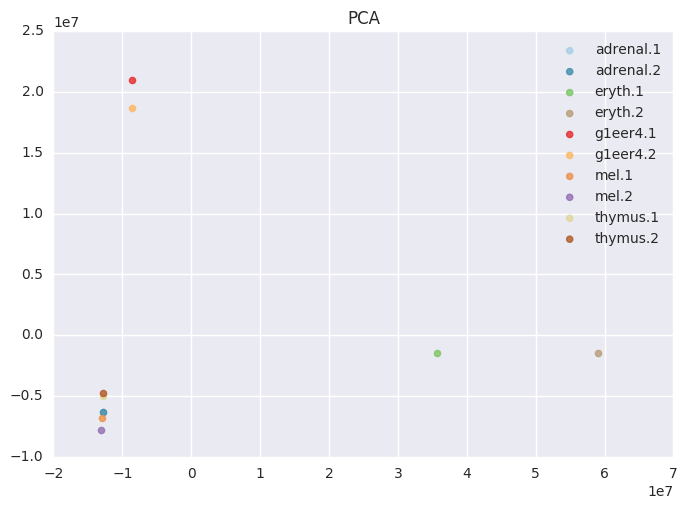

In [50]:
plt.figure()
lw = 1
for color, x, target_name in zip(colors, X_r, labels):
    plt.scatter(x[0], x[1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.show()